# 将mp3音频转换成MFCC向量
## （频率x时间）

In [31]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as path
from tqdm import tqdm as progress
import pickle

## 定义返回并可视化MFCC的函数

In [20]:
def get_mfcc(filename, sr=None):
    y, sr = librosa.load(filename, sr=sr)
    return librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

def visualize_mfcc(filename, sr=None):
    mfccs = get_mfcc(filename, sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    return mfccs

In [5]:
os.chdir('../Data/Sounds/MP3/')

In [8]:
os.listdir()

['Positive', '.DS_Store', 'Negative']

In [39]:
os.chdir('Negative/')

FileNotFoundError: [Errno 2] No such file or directory: 'Negative/'

In [40]:
file_list = os.listdir()

## 预览第一个音频

array([[-7.00163529e+02, -7.00163529e+02, -7.00163529e+02, ...,
        -6.53565430e+02, -7.00163529e+02, -7.00163529e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.90297535e+01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.60015787e+01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.17712409e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.15243529e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.43861910e-01,  0.00000000e+00,  0.00000000e+00]])

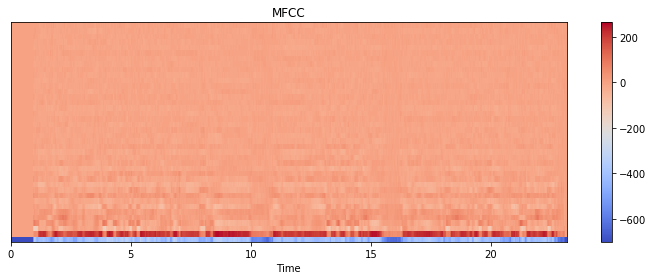

In [41]:
filename = file_list[0]
visualize_mfcc(filename)

In [42]:
for filename in progress(file_list):
    mfccs = get_mfcc(filename)
    portions = filename.split('.')
    assert portions[-1] == 'mp3'
    portions[-1] = 'ftr' # stands for feature
    newname = '.'.join(portions)
    with open(newname, 'wb') as f:
        pickle.dump(mfccs, f)
print('Done.')

  6%|▌         | 2/35 [00:00<00:02, 12.07it/s]

converting 手上正面 大声 1.mp3...
converting 桌上正面 大声 1.mp3...
converting 桌上正面 大声 3.mp3...


 14%|█▍        | 5/35 [00:00<00:02, 11.30it/s]

converting 手上正面 大声 3.mp3...
converting 手上正面 大声 2.mp3...
converting 桌上正面 大声 2.mp3...


 23%|██▎       | 8/35 [00:00<00:02, 10.70it/s]

converting 桌上正面 小声 1.mp3...
converting 手上正面 小声 1.mp3...
converting 桌上正面 小声 2.mp3...


 31%|███▏      | 11/35 [00:01<00:02, 10.27it/s]

converting 手上正面 小声 2.mp3...
converting 手上正面 小声 3.mp3...
converting 桌上正面 小声 3.mp3...


 40%|████      | 14/35 [00:01<00:01, 10.59it/s]

converting 手上反面 小声 2.mp3...
converting 耳旁 小声 2.mp3...
converting 裤兜 大声 2.mp3...


 46%|████▌     | 16/35 [00:01<00:01, 10.50it/s]

converting 桌上反面 小声 2.mp3...
converting 桌上反面 小声 3.mp3...
converting 裤兜 大声 3.mp3...


 57%|█████▋    | 20/35 [00:01<00:01, 10.52it/s]

converting 耳旁 小声 3.mp3...
converting 手上反面 小声 3.mp3...
converting 耳旁 小声 1.mp3...


 63%|██████▎   | 22/35 [00:02<00:01, 10.00it/s]

converting 裤兜 大声 1.mp3...
converting 桌上反面 小声 1.mp3...


 69%|██████▊   | 24/35 [00:02<00:01,  9.48it/s]

converting 耳旁 大声 3.mp3...
converting 手上反面 大声 3.mp3...
converting 桌上反面 大声 3.mp3...


 77%|███████▋  | 27/35 [00:02<00:00,  8.10it/s]

converting 裤兜 小声 3.mp3...
converting 裤兜 小声 2.mp3...


 83%|████████▎ | 29/35 [00:02<00:00,  7.87it/s]

converting 桌上反面 大声 2.mp3...
converting 手上反面 大声 2.mp3...
converting 耳旁 大声 2.mp3...


 91%|█████████▏| 32/35 [00:03<00:00,  7.86it/s]

converting 裤兜 小声 1.mp3...
converting 桌上反面 大声 1.mp3...


 97%|█████████▋| 34/35 [00:03<00:00,  7.82it/s]

converting 手上反面 大声 1.mp3...
converting 耳旁 大声 1.mp3...


100%|██████████| 35/35 [00:03<00:00,  9.45it/s]

Done.


In [43]:
filename = '耳旁 大声 1.ftr'
with open(filename, 'rb') as f:
    a = pickle.load(f)
a.shape

(40, 1299)